# Table of Contents:
* [Import Packages](#first-bullet)
* [Read In Data](#two-bullet)
* [Participation Rate Plots](#three-bullet)
* [Registered Voters By Segment ](#four-bullet)
* [Obama Approval Rating, Polls](#five-bullet)
* [Donations By Election, District ](#six-bullet)

This notebook will create various plots from the data that we imported in the previous notebook.

Due to the use of Plotly, anybody reading this notebook will need to run the cells that contain the visualizations to use their interactive features.  Images of each Plotly graph have been inserted in the notebook for viewing on Github.

# Import Packages <a class="anchor" id="first-bullet"></a>

In [3]:
# Import our libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
import cufflinks as cf
import plotly as py
import plotly.graph_objs as go

In [5]:
from ipywidgets import widgets

In [6]:
from datetime import datetime, date, time, timedelta

In [7]:
import matplotlib.pyplot as plt

# Read In Data <a class="anchor" id="two-bullet"></a>

In [8]:
gen_participation = pd.read_csv('./data/agged_participation/gen_participation_full_dataset.csv')

In [9]:
gen_participation_age = pd.read_csv('./data/agged_participation/gen_participation_age_full_dataset.csv')

In [10]:
gen_participation_cd = pd.read_csv('./data/agged_participation/gen_participation_cd_full_dataset.csv')

In [11]:
voter_reg_df = pd.read_csv('./data/grouped_registration.csv')

In [12]:
obama_approval_rate = pd.read_csv('./data/nc_obama_job_approval_poll.csv')

In [13]:
# data from https://www.followthemoney.org/tools/election-overview?s=NC&y=2010
df_money = pd.read_csv('./data/follow_the_money/donations.csv')

# Participation Rate Plots <a class="anchor" id="three-bullet"></a>

In [14]:
election = widgets.Dropdown(
    options=list(gen_participation['election_date'].unique()),
    value='2018-11-06',
    description='Election Date:',
)

trace1 = go.Bar(x=gen_participation['segment'],
         y=gen_participation['turnout_rate'] ,  name='Arrival Delays')
g = go.FigureWidget(data=[trace1],
                    layout=go.Layout(
                        title=dict(
                            text='Turnout By Election, Segment'
                        ),
                        barmode='overlay'
                    ))
def validate():
    if election.value in gen_participation['election_date'].unique():
        return True
    else:
        return False


def response(change):
    if validate():
        filter_list = [i for i in gen_participation['election_date'] == election.value]
        temp_df = gen_participation[filter_list]
        x1 = temp_df['segment']
        y1 = temp_df['turnout_rate']
        with g.batch_update():
            g.data[0].x = x1
            g.data[0].y = y1
            g.layout.barmode = 'group'
            g.layout.xaxis.title = 'Voter Segment'
            g.layout.yaxis.title = 'Turnout Rate'


election.observe(response, names="value")

In [30]:
container2 = widgets.HBox([election])
widgets.VBox([
              container2,
              g
    
             ])

Note: The interactive plots can be made available by running the code. For Github display, images of the interactive plots are displayed below the code for the respective plot.


![alt text](images/turnout_by_election_segment.jpg "Title")

We can see that voter turnout varies across the racial and ethnic groups that are contained in the voter file.  This indicated that it may be a useful predictor for our model.

Race Description

	B:  	BLACK or AFRICAN AMERICAN                                   
	I:  	AMERICAN INDIAN or ALASKA NATIVE                            
	O:  	OTHER                                                       
	W:  	WHITE                                                       
	U:  	UNDESIGNATED                                                
	A:  	ASIAN                                                       
	M:  	TWO or MORE RACES   
    
Ethnic Code Descriptions

	NL:  	Non-Latino Househousehold                                         
	UN:  	Unidentified Latino Household Status                                                   
	HL:  	Latino Household  

In [31]:
election = widgets.Dropdown(
    options=list(gen_participation_age['election_date'].unique()),
    value='2018-11-06',
    description='Election Date:',
)

#container = widgets.HBox(children=[election])
trace1 = go.Bar(x=gen_participation_age['segment'],
         y=gen_participation_age['turnout_rate'] ,  name='Arrival Delays')
g = go.FigureWidget(data=[trace1],
                    layout=go.Layout(
                        title=dict(
                            text='Turnout By Election, Age'
                        ),
                        barmode='overlay'
                    ))

def validate():
    if election.value in gen_participation_age['election_date'].unique():
        return True
    else:
        return False


def response(change):
    if validate():
        filter_list = [i for i in gen_participation_age['election_date'] == election.value]
        temp_df = gen_participation_age[filter_list]
       # x1 = gen_participation['election_date']
        x1 = temp_df['segment']
        y1 = temp_df['turnout_rate']
    #    x2 = temp_df['dep_delay']
        with g.batch_update():
           # print(f'X1: {type(x1)}')
           # print(x1)
            g.data[0].x = x1
            g.data[0].y = y1
           # g.data[0].x = x1
          #  g.data[1].x = x2
            g.layout.barmode = 'group'
            g.layout.xaxis.title = 'Voter Segment'
            g.layout.yaxis.title = 'Turnout Rate'


election.observe(response, names="value")
# textbox.observe(response, names="value")
# month.observe(response, names="value")
# use_date.observe(response, names="value")

container2 = widgets.HBox([election])
widgets.VBox([#container,
              container2,
              g
             ])

![alt text](images/turnout_by_election_age.jpg "Title")

We can see that North Carolinian's vote at different rates, based on age.  Including age in our model may be useful.

In [32]:
#gen_participation_cd
election = widgets.Dropdown(
    options=list(gen_participation_cd['election_date'].unique()),
    value='2018-11-06',
    description='Election Date:',
)

#container = widgets.HBox(children=[election])
trace1 = go.Bar(x=gen_participation_cd['cd'],
         y=gen_participation_cd['turnout_rate'] ,  name='Dem Turnout')
trace2 = go.Bar(x=gen_participation_cd['cd'],
         y=gen_participation_cd['turnout_rate'] ,  name='Rep Turnout')
g = go.FigureWidget(data=[trace1, trace2],
                    layout=go.Layout(
                        title=dict(
                            text='Turnout By Election, Segment, District'
                        ),
                        barmode='group'
                    ))

def validate():
    if election.value in gen_participation_cd['election_date'].unique():
        return True
    else:
        return False


def response(change):
    if validate():
      #  filter_list = [i for i in gen_participation_cd['election_date'] == election.value]
        dem_filter_list = [i and j for i,j in zip(gen_participation_cd['election_date'] == election.value ,
                                          gen_participation_cd['party'] == 'DEM')]

        rep_filter_list = [i and j for i,j in zip(gen_participation_cd['election_date'] == election.value ,
                                          gen_participation_cd['party'] == 'REP')]
        
        temp_df_dem = gen_participation_cd[dem_filter_list]
        temp_df_rep = gen_participation_cd[rep_filter_list]
       # temp_df_rep
       # x1 = gen_participation['election_date']
        x1 = temp_df_dem['cd']
        x2 = temp_df_rep['cd']
        y1 = temp_df_dem['turnout_rate']
        y2 = temp_df_rep['turnout_rate']
    #    x2 = temp_df['dep_delay']
        with g.batch_update():
           # print(f'X1: {type(x1)}')

        #    print(g.data[0])
            g.data[0].x = x1
           # print(g.data)
            g.data[1].x = x2
            g.data[0].y = y1
            g.data[1].y = y2
        #    print(y1)
        #    print(y2)
           # g.data[0].x = x1
          #  g.data[1].x = x2
            g.layout.barmode = 'group'
            g.layout.xaxis.title = 'Congressional District'
            g.layout.yaxis.title = 'Turnout Rate'


election.observe(response, names="value")
# textbox.observe(response, names="value")
# month.observe(response, names="value")
# use_date.observe(response, names="value")

container2 = widgets.HBox([election])
widgets.VBox([#container,
              container2,
              g
             ])

![alt text](images/turnout_by_election_segment_district.jpg "Title")

Voters turnout to vote at different levels based on their party affiliation and their congressional district.  We will want to include this variable in our model to see if it has any effect on our predictions.

# Registered Voters By Segment  <a class="anchor" id="four-bullet"></a>

In [39]:
df_for_chart = voter_reg_df

seg = widgets.Dropdown(
    options=list(df_for_chart['seg'].unique()),
    value='Total',
    description='Segment:',
)

county = widgets.Dropdown(
    options=list(df_for_chart['CountyName'].unique()),
    value='"ALAMANCE"',
    description='County:',
)

container = widgets.HBox(children=[seg, county])

trace1 = go.Bar(x=df_for_chart['Date'],
         y=df_for_chart['Total'] ,  name='Arrival Delays')
g = go.FigureWidget(data=[trace1],
                    layout=go.Layout(
                        title=dict(
                            text='Registered Voters By Month, County, Segment'
                        ),
                        barmode='overlay',
                        autosize=False,
                        width=800,
                        height=400,
                        margin=go.layout.Margin(
                            l=50,
                            r=50,
                            b=150,
                            t=100,
                            pad=4
                        )
                    ))

def validate():
    if seg.value in df_for_chart['seg'].unique():
        return True
    else:
        return False


def response(change):
    if validate():
       # filter_list = [i for i in gen_participation_age['election_date'] == election.value]
        
        filter_list = [i and j for i, j in zip(df_for_chart['seg'] == seg.value,df_for_chart['CountyName'] == county.value)]
        
        temp_df = df_for_chart[filter_list]
      #  print(temp_df.head())
       # x1 = gen_participation['election_date']
        x1 = temp_df['Date']
        y1 = temp_df['Total']
    #    x2 = temp_df['dep_delay']
        with g.batch_update():
           # print(f'X1: {type(x1)}')
          #  print(x1)
            g.data[0].x = x1
            g.data[0].y = y1
           # g.data[0].x = x1
          #  g.data[1].x = x2
            g.layout.barmode = 'group'
            g.layout.xaxis.title = 'Week'
            g.layout.yaxis.title = 'Total registered Voters'


seg.observe(response, names="value")
county.observe(response, names="value")

# textbox.observe(response, names="value")
# month.observe(response, names="value")
# use_date.observe(response, names="value")

#container = widgets.HBox([election])
widgets.VBox([#container,
              container,
              g
             ])

![alt text](images/registered_voters_by_month_county_segment.jpg "Title")

Looking at the number of total registered voters by month, we can see that at the end of each year there is a slight drop down.  This is likely due to the BOE cleaning up the registrations, and culling those that are no longer valid.  We will have to keep in mind, especially for historic data, that our voter file only contains active registrations.

# Obama Approval Rating, Polls  <a class="anchor" id="five-bullet"></a>

In [17]:
obama_approval_rate['date'] = pd.to_datetime(obama_approval_rate['date'])
obama_approval_rate = obama_approval_rate.set_index('date')

In [18]:
obama_approval_rate.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 650 entries, 2009-01-18 to 2016-11-17
Data columns (total 4 columns):
label    650 non-null object
value    650 non-null float64
low      0 non-null float64
high     0 non-null float64
dtypes: float64(3), object(1)
memory usage: 25.4+ KB


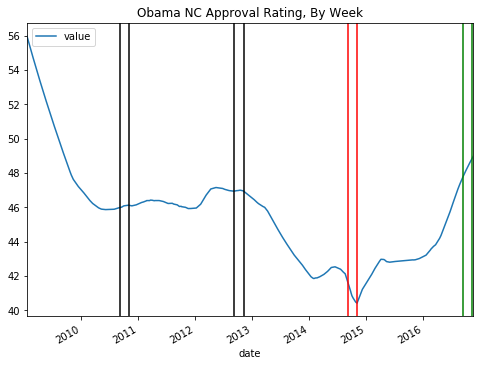

In [19]:
mask = obama_approval_rate['label'] == 'Approve'
obama_approval_rate[mask].plot( y='value', kind='line', figsize=(8, 6), title='Obama NC Approval Rating, By Week')

election_dates = {2018: '2018-11-06',
 2016: '2016-11-08',
 2014: '2014-11-04',
 2012: '2012-11-06',
 2010: '2010-11-02'}


plt.axvline(datetime.strptime(election_dates.get(2016) , '%Y-%m-%d') - timedelta(days=60), color='g')
plt.axvline(datetime.strptime(election_dates.get(2016) , '%Y-%m-%d'), color='g')

plt.axvline(datetime.strptime(election_dates.get(2014) , '%Y-%m-%d') - timedelta(days=60), color='r')
plt.axvline(datetime.strptime(election_dates.get(2014) , '%Y-%m-%d'), color='r')

plt.axvline(datetime.strptime(election_dates.get(2012) , '%Y-%m-%d') - timedelta(days=60), color='k')
plt.axvline(datetime.strptime(election_dates.get(2012) , '%Y-%m-%d'), color='k')

plt.axvline(datetime.strptime(election_dates.get(2010) , '%Y-%m-%d') - timedelta(days=60), color='k')
plt.axvline(datetime.strptime(election_dates.get(2010) , '%Y-%m-%d'), color='k')

Looking at President Obama's approval rating among NC residents, we can see that in 2010 and 2012, in the sixty days leading up to the election, that his numbers were stable.  However, in 2014, his polling average fell in the 60 days leading up to the election.  2016 saw his polling numbers among North Carolinians rise in that 2 month period.

# Donations By Election, District  <a class="anchor" id="six-bullet"></a>

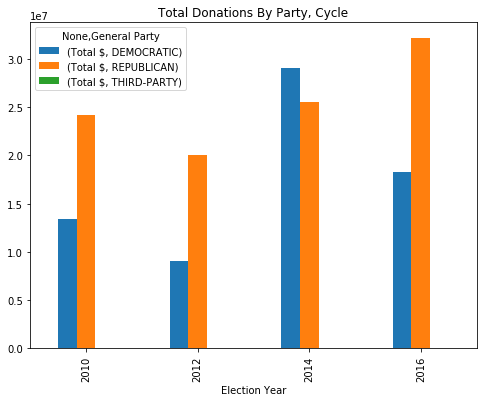

In [20]:

df_money.groupby(['Election Year',  'General Party' ]).agg({'Total $':'sum'}).unstack().plot(kind='bar', figsize=(8, 6), title='Total Donations By Party, Cycle')

In each of the four election cycles between 2010 and 2016, donations to republican candidates outnumbered those to democratic candidates, with the exception of 2014.

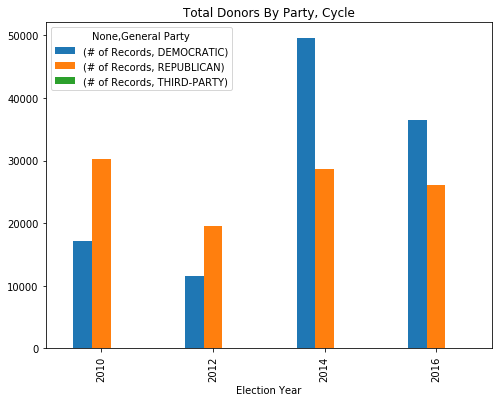

In [21]:
df_money.groupby(['Election Year',  'General Party' ]).agg({'# of Records':'sum'}).unstack().plot(kind='bar', figsize=(8, 6), title='Total Donors By Party, Cycle')


Looking at the number of donors per cycle, we can see that in 2010 and 2012, Republican candidates had more donors.  However, in 2014 and 2016, Democratic candidates had more donors.  2016 is interesting because Republican candidates received more total donations ($), indicating that the donation total per donor was higher.

In [40]:
df_donors = df_money.groupby(['Election Year', 'Office Sought' ,'General Party' ]).agg({'# of Records':'sum'})

In [41]:
df_donors = df_donors.reset_index(level=['Office Sought' ,'General Party', 'Election Year'])

In [45]:
#gen_participation_cd
election = widgets.Dropdown(
    options=list(df_donors['Election Year'].unique()),
    value=list(df_donors['Election Year'].unique())[0],
    description='Election Date:',
)

#container = widgets.HBox(children=[election])
trace1 = go.Bar(x=df_donors['Office Sought'],
         y=df_donors['# of Records'] ,  name='Dem Donors')
trace2 = go.Bar(x=df_donors['Office Sought'],
         y=df_donors['# of Records'] ,  name='Rep Donors')
g = go.FigureWidget(data=[trace1, trace2],
                    layout=go.Layout(
                        title=dict(
                            text='Donors By Election, Segment, District'
                        ),
                        barmode='group',
                        autosize=False,
                        width=800,
                        height=500,
                        margin=go.layout.Margin(
                            l=50,
                            r=50,
                            b=150,
                            t=100,
                            pad=4
                        )
                    ))

def validate():
    if election.value in df_donors['Election Year'].unique():
        return True
    else:
        return False


def response(change):
    if validate():
      #  filter_list = [i for i in gen_participation_cd['election_date'] == election.value]
        dem_filter_list = [i and j for i,j in zip(df_donors['Election Year'] == election.value ,
                                          df_donors['General Party'] == 'DEMOCRATIC')]

        rep_filter_list = [i and j for i,j in zip(df_donors['Election Year'] == election.value ,
                                          df_donors['General Party'] == 'REPUBLICAN')]
        
        temp_df_dem = df_donors[dem_filter_list]
        temp_df_rep = df_donors[rep_filter_list]
       # temp_df_rep
       # x1 = gen_participation['election_date']
        x1 = temp_df_dem['Office Sought']
        x2 = temp_df_rep['Office Sought']
        y1 = temp_df_dem['# of Records']
        y2 = temp_df_rep['# of Records']
    #    x2 = temp_df['dep_delay']
        with g.batch_update():
           # print(f'X1: {type(x1)}')

        #    print(g.data[0])
            g.data[0].x = x1
           # print(g.data)
            g.data[1].x = x2
            g.data[0].y = y1
            g.data[1].y = y2
        #    print(y1)
        #    print(y2)
           # g.data[0].x = x1
          #  g.data[1].x = x2
            g.layout.barmode = 'group'
            g.layout.xaxis.title = 'Congressional District'
            g.layout.yaxis.title = '# Of Donors'


election.observe(response, names="value")
# textbox.observe(response, names="value")
# month.observe(response, names="value")
# use_date.observe(response, names="value")

container2 = widgets.HBox([election])
widgets.VBox([#container,
              container2,
              g
             ])

![alt text](images/donors_by_election_segment_district.jpg "Title")

In 2016, Republican candidates in congressional races had more donors for the most part.  However the Senate race attracted many more donors tot eh Democratic candidate.

In [43]:
df_dollars = df_money.groupby(['Election Year', 'Office Sought' ,'General Party' ]).agg({'Total $':'sum'})
df_dollars = df_dollars.reset_index(level=['Office Sought' ,'General Party', 'Election Year'])


In [44]:
#gen_participation_cd
election = widgets.Dropdown(
    options=list(df_dollars['Election Year'].unique()),
    value=list(df_dollars['Election Year'].unique())[0],
    description='Election Date:',
)

#container = widgets.HBox(children=[election])
trace1 = go.Bar(x=df_dollars['Office Sought'],
         y=df_dollars['Total $'] ,  name='Dem Donations')
trace2 = go.Bar(x=df_dollars['Office Sought'],
         y=df_dollars['Total $'] ,  name='Rep Donations')
g = go.FigureWidget(data=[trace1, trace2],
                    layout=go.Layout(
                        title=dict(
                            text='Donations in Dollars By Election, Segment, District'
                        ),
                        barmode='group',
                        autosize=False,
                        width=800,
                        height=500,
                        margin=go.layout.Margin(
                            l=50,
                            r=50,
                            b=150,
                            t=100,
                            pad=4
                        )
                    ))

def validate():
    if election.value in df_dollars['Election Year'].unique():
        return True
    else:
        return False


def response(change):
    if validate():
      #  filter_list = [i for i in gen_participation_cd['election_date'] == election.value]
        dem_filter_list = [i and j for i,j in zip(df_dollars['Election Year'] == election.value ,
                                          df_dollars['General Party'] == 'DEMOCRATIC')]

        rep_filter_list = [i and j for i,j in zip(df_dollars['Election Year'] == election.value ,
                                          df_dollars['General Party'] == 'REPUBLICAN')]
        
        temp_df_dem = df_dollars[dem_filter_list]
        temp_df_rep = df_dollars[rep_filter_list]
       # temp_df_rep
       # x1 = gen_participation['election_date']
        x1 = temp_df_dem['Office Sought']
        x2 = temp_df_rep['Office Sought']
        y1 = temp_df_dem['Total $']
        y2 = temp_df_rep['Total $']
    #    x2 = temp_df['dep_delay']
        with g.batch_update():
           # print(f'X1: {type(x1)}')

        #    print(g.data[0])
            g.data[0].x = x1
           # print(g.data)
            g.data[1].x = x2
            g.data[0].y = y1
            g.data[1].y = y2
        #    print(y1)
        #    print(y2)
           # g.data[0].x = x1
          #  g.data[1].x = x2
            g.layout.barmode = 'group'
            g.layout.xaxis.title = 'Congressional District'
            g.layout.yaxis.title = 'Total Donations in Dollars'
           

election.observe(response, names="value")
# textbox.observe(response, names="value")
# month.observe(response, names="value")
# use_date.observe(response, names="value")

container2 = widgets.HBox([election])
widgets.VBox([#container,
              container2,
              g
             ])

![alt text](images/donations_by_election_segment_district.jpg "Title")

As we can see, the 2016 Senate race between Burr (R) and Ross (D) was the most expensive race in the state that year.